# Introduction to TensorFlow 2 #

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/_api/v2/version/__init__.py'>


First: check that running the cell above gives you tensorflow v2, from the tf2.11 environment.  Now let's declare some constants:

In [8]:
# constants
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=tf.float32)

x = np.array([[1, 2], [3, 4]])
c = tf.constant(x)

d = tensor = tf.constant(-1.0, shape=[2, 2])

**Print the contents of a,b,c and d.  Now look up the documentation for tf.rank and tf.shape and find the rank and shape of c**

In [15]:
print(a,b,c,d)
?tf.rank

tf.Tensor(3.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32) tf.Tensor([ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], shape=(10,), dtype=float32) tf.Tensor(
[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]], shape=(10, 1), dtype=float32)


Signature: tf.rank(input, name=None)
Docstring:
Returns the rank of a tensor.

See also `tf.shape`.

Returns a 0-D `int32` `Tensor` representing the rank of `input`.

For example:

```python
# shape of tensor 't' is [2, 2, 3]
t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
tf.rank(t)  # 3
```

**Note**: The rank of a tensor is not the same as the rank of a matrix. The
rank of a tensor is the number of indices required to uniquely select each
element of the tensor. Rank is also known as "order", "degree", or "ndims."

Args:
  input: A `Tensor` or `SparseTensor`.
  name: A name for the operation (optional).

Returns:
  A `Tensor` of type `int32`.

@compatibility(numpy)
Equivalent to np.ndim
@end_compatibility
File:      /srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py
Type:      function


In [16]:
?tf.shape

Signature: tf.shape(input, out_type=tf.int32, name=None)
Docstring:
Returns a tensor containing the shape of the input tensor.

See also `tf.size`, `tf.rank`.

`tf.shape` returns a 1-D integer tensor representing the shape of `input`.
For a scalar input, the tensor returned has a shape of (0,) and its value is
the empty vector (i.e. []).

For example:

>>> tf.shape(1.)
<tf.Tensor: shape=(0,), dtype=int32, numpy=array([], dtype=int32)>

>>> t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
>>> tf.shape(t)
<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 3], dtype=int32)>

Note: When using symbolic tensors, such as when using the Keras API,
tf.shape() will return the shape of the symbolic tensor.

>>> a = tf.keras.layers.Input((None, 10))
>>> tf.shape(a)
<... shape=(3,) dtype=int32...>

In these cases, using `tf.Tensor.shape` will return more informative results.

>>> a.shape
TensorShape([None, None, 10])

(The first `None` represents the as yet unknown batch size.

**What are rank and shape telling you about the tensor?**

Now let's look at variables

In [10]:
# variables
tensorVar = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], name="tensorVar")

**Print tensorVar, and then use tensorVar.assign to make a tensor containing tensorVar+1 (i.e. [2,3...11])**

In [28]:
print(tensorVar)
tensorVar.assign(tensorVar+1)

<tf.Variable 'tensorVar:0' shape=(10,) dtype=int32, numpy=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)>


<tf.Variable 'UnreadVariable' shape=(10,) dtype=int32, numpy=array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)>

Various mathematical operations are available:

In [13]:
a        = tf.constant(3.0, dtype=tf.float32)
b        = tf.constant(4.0) # also tf.float32 implicitly
total    = a + b
product  = a * b
quotient = a/b
srt      = tf.sqrt(a) # scalar
c        = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=tf.float32) # rank 1 tensor 
d        = tf.constant([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]], dtype=tf.float32) # rank 2 tensor
aquotient= c/d    # compute a rank 2 Tensor for this division
print("a           = ", a)
print("b           = ", b)
print("Total       = ", total)
print("Product     = ", product)
print("sqrt(a)     = ", srt)
print("N=(1,...10) = ", c)
print("sqrt(c)     = ", tf.sqrt(c))
print("sqrt(d)     = ", tf.sqrt(d))

a           =  tf.Tensor(3.0, shape=(), dtype=float32)
b           =  tf.Tensor(4.0, shape=(), dtype=float32)
Total       =  tf.Tensor(7.0, shape=(), dtype=float32)
Product     =  tf.Tensor(12.0, shape=(), dtype=float32)
sqrt(a)     =  tf.Tensor(1.7320508, shape=(), dtype=float32)
N=(1,...10) =  tf.Tensor([ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.], shape=(10,), dtype=float32)
sqrt(c)     =  tf.Tensor(
[1.        1.4142135 1.7320508 2.        2.236068  2.4494898 2.6457512
 2.828427  3.        3.1622777], shape=(10,), dtype=float32)
sqrt(d)     =  tf.Tensor(
[[1.       ]
 [1.4142135]
 [1.7320508]
 [2.       ]
 [2.236068 ]
 [2.4494898]
 [2.6457512]
 [2.828427 ]
 [3.       ]
 [3.1622777]], shape=(10, 1), dtype=float32)


In addition to element wise operations that are defined, TensorFlow has a number of figure of merit (metric) computations defined.  For some data (this example uses a numpy array, it also works with tensors) we can compute the sum, mean, product … of the elements

In [14]:
# generate some data and perform calculations on this
Ngen = 10
min_x = 1
max_x = 10
data = tf.random.uniform([Ngen, 1], min_x, max_x,seed=1)  # training set

data_sqrt = np.sqrt(data)

# the following are tensor outputs
print("data           = ",data)
print("sqrt(data)     = ",data_sqrt)

data           =  tf.Tensor(
[[3.1513367]
 [9.283596 ]
 [1.4546119]
 [5.4617004]
 [8.519701 ]
 [1.2382338]
 [1.7930176]
 [5.1099434]
 [7.9195533]
 [7.638727 ]], shape=(10, 1), dtype=float32)
sqrt(data)     =  [[1.7752005]
 [3.0468993]
 [1.2060729]
 [2.337028 ]
 [2.9188526]
 [1.1127596]
 [1.3390361]
 [2.2605183]
 [2.8141701]
 [2.7638247]]


**Look up the reduce functions in TensorFlow and use them to print the sum, mean, product, maximum and minimum of the data**

In [18]:
print(tf.math.reduce_sum(data))
print(tf.math.reduce_mean(data))
print(tf.math.reduce_max(data))
print(tf.math.reduce_min(data))

tf.Tensor(51.57042, shape=(), dtype=float32)
tf.Tensor(5.157042, shape=(), dtype=float32)
tf.Tensor(9.283596, shape=(), dtype=float32)
tf.Tensor(1.2382338, shape=(), dtype=float32)


We can also do matrix multiplication:

In [19]:
# generate some data and perform calculations on this
I = tf.constant([[1, 0, 0],[0, 1, 0],[0, 0, 1]], name="A")
A = tf.constant([[1, 0, -1],[0, 1, 0],[-1, 0, 1]], name="A")
B = tf.constant([[1, 2, 3],[4, 5, 6],[7, 8, 9]], name="B")
C = tf.matmul(A, B)
D = tf.matmul(B, A)

print("A       = ", A)
print("B       = ", B)
print("\nC = A.B = ", C)
print("\nD = B.A = ", D)

A       =  tf.Tensor(
[[ 1  0 -1]
 [ 0  1  0]
 [-1  0  1]], shape=(3, 3), dtype=int32)
B       =  tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)

C = A.B =  tf.Tensor(
[[-6 -6 -6]
 [ 4  5  6]
 [ 6  6  6]], shape=(3, 3), dtype=int32)

D = B.A =  tf.Tensor(
[[-2  2  2]
 [-2  5  2]
 [-2  8  2]], shape=(3, 3), dtype=int32)


**By looking at A.I, I.A, B.I and I.B, verify that I is acting as the identity matrix**

In [26]:
AI = tf.matmul(A,I)
print(AI)
print(A)
print(A==AI)

tf.Tensor(
[[ 1  0 -1]
 [ 0  1  0]
 [-1  0  1]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ 1  0 -1]
 [ 0  1  0]
 [-1  0  1]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]], shape=(3, 3), dtype=bool)


**Use tensorflow (not numpy) to generate data for three different distributions and plot the data as histograms.  Generate 10000 data from: a normal distribution with mean=3.0, sigma=1.0, a uniform distribution between 0 and 5 and the square root of the previous uniform distribution.**

In [52]:
Ngen = 1000
min_x = 0
max_x = 1
DA = tf.random.normal(
    shape=[Ngen],
    mean=3.0,
    stddev=1.0,
    dtype=tf.dtypes.float32,
    seed=None,
    name=None)

Ngen2 = 10
min_x2 = 0
max_x2 = 5
data = tf.random.uniform([Ngen2], min_x2, max_x2,seed=1)  # training set

(array([  3.,  28.,  91., 165., 244., 233., 138.,  71.,  24.,   3.]),
 array([-0.1080997,  0.5211034,  1.1503065,  1.7795097,  2.4087126,
         3.0379157,  3.667119 ,  4.296322 ,  4.925525 ,  5.554728 ,
         6.1839314], dtype=float32),
 <BarContainer object of 10 artists>)

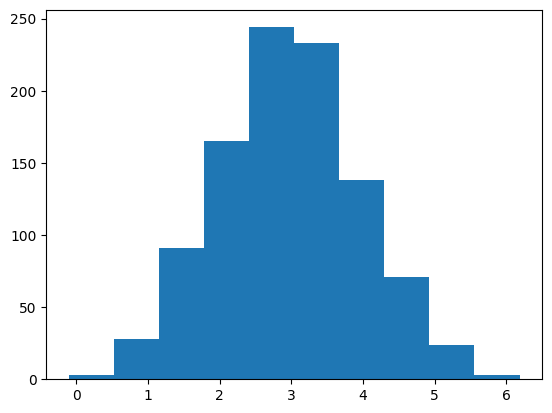

In [51]:
# now plot the gaussian distrigbution
plt.hist(DA)

(array([2., 1., 2., 2., 0., 0., 1., 1., 0., 1.]),
 array([0.75566053, 1.1652405 , 1.5748205 , 1.9844005 , 2.3939805 ,
        2.8035605 , 3.2131405 , 3.6227205 , 4.0323005 , 4.44188   ,
        4.8514605 ], dtype=float32),
 <BarContainer object of 10 artists>)

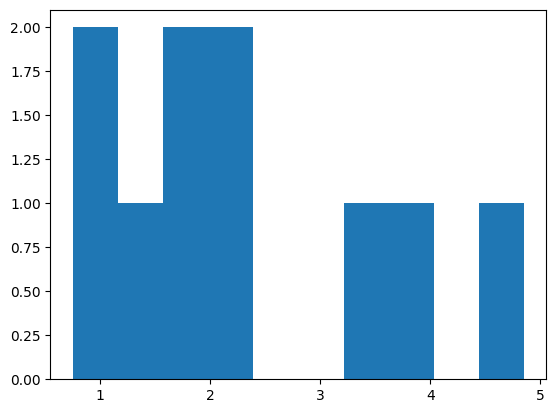

In [53]:
# now plot - the uniform distribution
plt.hist(data)

(array([2., 0., 1., 2., 2., 0., 0., 1., 1., 1.]),
 array([0.8692874, 1.0026189, 1.1359506, 1.2692821, 1.4026136, 1.5359452,
        1.6692768, 1.8026084, 1.9359399, 2.0692716, 2.202603 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

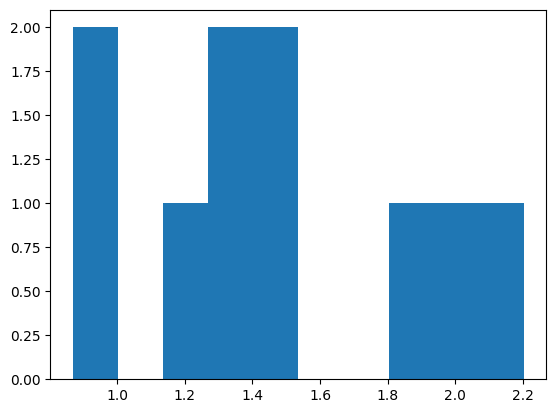

In [54]:
# now plot - the sqrt(uniform) distribution
plt.hist(np.sqrt(data))

**CHECKPOINT - Get a demonstrator to look at your work!**

**Bonus task - can you make the same distributions with numpy and compare them?**